## Atividade: Bolsa Família


### Disponível também no repositório https://github.com/Jownao/dive_datascience

* Os dados são compostos por dois arquivos: 
    * A base família - (data_familia_sergipe.csv)
    * A base pessoas - (data_pessoas_sergipe.csv)  
* As bases são desidentificadas, ou seja, não possuem informações que permitam identificar quem são as pessoas. Cada base é composta por uma série de identificadores sócio-econômico das pessoas e famílias. Existe um identificador que permite associar família e pessoas.

Os atributos da base está disponível [aqui](https://github.com/Jownao/dive_datascience/blob/main/datasets/03_bolsa_familia/Dicionario_base_desidentificada_pt.xlsx) (Dicionario_base_desidentificada_pt.xlsx)



## Imports e informações adicionais

In [36]:
# Importação de pacotes necessários para este laboratório

import seaborn as sns #Visualização
import matplotlib.pyplot as plt #Visualização
import pandas as pd #Biblioteca Pandas para os dados
import numpy as np #Biblioteca para trabalhar com números

def convert_sums_frame(sums_object, columns):
    frame_ = pd.DataFrame(sums_object)
    frame_.reset_index(inplace=True)
    frame_.columns = columns

    return frame_

In [13]:
# Dados das famílias
dataf = pd.read_csv("../datasets/03_bolsa_familia/data_familia_sergipe.csv")

# Dados das pessoas
datap = pd.read_csv("../datasets/03_bolsa_familia/data_pessoas_sergipe.csv")

In [62]:
#df.drop(df.loc[df['line_race']==0].index, inplace=True)
#ataf.loc[dataf['qtd_comodos_domic_fam']==20]

In [10]:
dataf.head()

,cd_ibge,estrato,classf,id_familia,dat_cadastramento_fam,dat_alteracao_fam,vlr_renda_media_fam,dat_atualizacao_familia,cod_local_domic_fam,cod_especie_domic_fam,...,cod_familia_indigena_fam,ind_familia_quilombola_fam,nom_estab_assist_saude_fam,cod_eas_fam,nom_centro_assist_fam,cod_centro_assist_fam,ind_parc_mds_fam,marc_pbf,qtde_pessoas,peso.fam
0,2806206,2,3,183415.0,2006-01-07,2018-09-30,58.0,2018-02-27,1.0,1.0,...,2.0,2.0,P S IVA SALGUEIRO,2421836.0,CRAS CENTRO DE REFERENCIA DA ASSISTENCIA SOCIAL,2.806200e+10,0.0,0,4,550052838636015
1,2803609,2,3,183416.0,2010-03-09,2018-09-30,190.0,2018-07-20,2.0,1.0,...,2.0,2.0,POSTO DE SAUDE RICARDO HAGENBECK,2421380.0,CRAS ANGELA MARIA DE CARVALHO LIMA BOMFIM,2.803602e+10,0.0,0,5,550245146328323
2,2803203,2,3,183417.0,2006-02-25,2018-09-30,100.0,2018-08-21,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1,2,550305936601879
3,2805703,2,3,183418.0,2004-05-25,2017-12-15,937.0,2017-11-09,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,0,1,550405659971983
4,2805307,1,3,183419.0,2016-03-31,2018-10-15,25.0,2018-10-15,2.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1,2,550245146328323


In [12]:
datap.head()

,cd_ibge,estrato,classf,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,...,cod_trabalho_12_meses_memb,qtd_meses_12_meses_memb,val_renda_bruta_12_meses_memb,val_renda_doacao_memb,val_renda_aposent_memb,val_renda_seguro_desemp_memb,val_renda_pensao_alimen_memb,val_outras_rendas_memb,peso.fam,peso.pes
0,2805208,1,3,206870.0,24.0,1,19,1,4.0,1.0,...,2.0,NaN,NaN,0.0,0.0,0.0,0.0,100.0,550245146328323,563273265962979
1,2805505,2,3,1936145.0,35.0,1,17,3,4.0,1.0,...,2.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,550245146328323,563340413648347
2,2800308,2,1,4239973.0,103.0,1,4,3,4.0,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,550245146328323,56328235405831
3,2805604,2,3,2022175.0,324.0,2,4,3,4.0,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,100.0,NaN,550390600873778,563301639311753
4,2801306,2,3,2300485.0,328.0,1,7,3,2.0,2.0,...,NaN,NaN,NaN,NaN,0.0,NaN,100.0,NaN,550361832442675,563323831491962


In [29]:
# Convertendo os atributos para categórico
dataf[['cod_local_domic_fam','cod_especie_domic_fam','cod_material_piso_fam',
'cod_material_domic_fam','cod_agua_canalizada_fam','cod_abaste_agua_domic_fam',
'cod_banheiro_domic_fam','cod_escoa_sanitario_domic_fam','cod_destino_lixo_domic_fam',
'cod_iluminacao_domic_fam','cod_calcamento_domic_fam','cod_familia_indigena_fam',
'ind_familia_quilombola_fam','ind_parc_mds_fam','estrato','classf','marc_pbf']] = dataf[['cod_local_domic_fam','cod_especie_domic_fam','cod_material_piso_fam',
'cod_material_domic_fam','cod_agua_canalizada_fam','cod_abaste_agua_domic_fam',
'cod_banheiro_domic_fam','cod_escoa_sanitario_domic_fam','cod_destino_lixo_domic_fam',
'cod_iluminacao_domic_fam','cod_calcamento_domic_fam','cod_familia_indigena_fam',
'ind_familia_quilombola_fam','ind_parc_mds_fam','estrato','classf','marc_pbf']].astype("category")

# Convertendo os atributos para objeto
dataf[['cod_centro_assist_fam','cod_eas_fam','id_familia','cd_ibge']] = dataf[['cod_centro_assist_fam','cod_eas_fam','id_familia','cd_ibge']].astype("object")



<AxesSubplot:xlabel='qtd_comodos_domic_fam', ylabel='id_familia'>

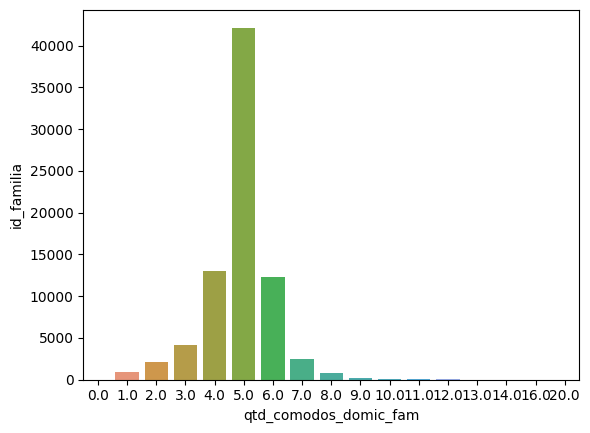

In [71]:
# Comodos x Pessoas / Grande parte possui entre 4-6 cômodos

dataf21 = dataf.groupby("qtd_comodos_domic_fam")['id_familia'].count()
dataf_sumpc = convert_sums_frame(dataf21, ['qtd_comodos_domic_fam','id_familia'])
sumpc = dataf_sumpc.sort_values(by='qtd_comodos_domic_fam', 
                      ascending=False )
sumpc
sns.barplot(data=sumpc, x="qtd_comodos_domic_fam",y="id_familia")

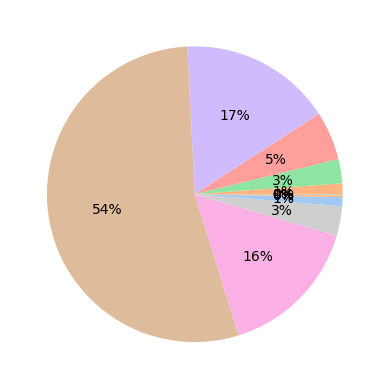

In [83]:
dataf_pie = dataf.groupby("qtd_comodos_domic_fam")["id_familia"].count()
colors = sns.color_palette('pastel')[0:8]
#Grafico de pizza para representar o gráfico acima
plt.pie(dataf_pie, colors = colors, autopct='%.0f%%')
plt.show()

In [30]:
dataf.describe()

,vlr_renda_media_fam,qtd_comodos_domic_fam,qtd_comodos_dormitorio_fam,qtde_pessoas,peso.fam
count,82275.000000,78105.000000,78119.000000,82275.000000,8.227500e+04
mean,218.447414,4.866423,1.965079,2.511188,5.502509e+14
std,304.996336,1.113348,0.669059,1.409489,7.763423e+10
min,0.000000,0.000000,0.000000,1.000000,5.500504e+14
25%,36.000000,4.000000,2.000000,1.000000,5.502184e+14
50%,75.000000,5.000000,2.000000,2.000000,5.502451e+14
75%,282.000000,5.000000,2.000000,3.000000,5.502791e+14
max,2811.000000,20.000000,20.000000,14.000000,5.504321e+14
